In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Regression Models

This chapter concerns regression problems: the goal is to estimate a univariate world state $ w $ based on observed measurements $ x $. The discussion is limited to discriminative methods in which the distribution $ P(w|x) $ of the world state is directly modeled. This contrasts with Chapter 7, where the focus was on generative models in which the likelihood $ P(x|w) $ of the observations is modeled. 

To motivate the regression problem, consider **body pose estimation**: here, the goal is to estimate the joint angles of a human body based on an observed image of the person in an unknown pose (Figure 8.1). Such an analysis could form the first step toward **activity recognition**. 

We assume that the image has already been preprocessed and a low-dimensional vector $ x $ that represents the shape of the contour has been extracted. Our goal is to use this data vector to predict a second vector containing the joint angles for each of the major body joints. In practice, we will estimate each joint angle separately; we can hence concentrate our discussion on how to estimate a univariate quantity $ w $ from continuous observed data $ x $. 

We begin by assuming that the relation between the world and the data is **linear** and that the uncertainty around this prediction is **normally distributed** with constant variance. This is the **linear regression** model.

## 1. Linear Regression

The goal of linear regression is to predict the posterior distribution $ P(w|x) $ over the world state $ w $ based on observed data $ x $. Since this is a discriminative model, we proceed by choosing a probability distribution over the world $ w $ and making the parameters dependent on the data $ x $. 

The world state $ w $ is **univariate and continuous**, so a suitable distribution is the **univariate normal**. In linear regression (Fig.2), we make the mean $ \mu $ of this normal distribution a linear function $ \phi_0 + \phi^T x_i $ of the data and treat the variance $ \sigma^2 $ as a constant:

$$
P(w_i |x_i , \theta) = \mathcal{N} \Big(w_i \mid \phi_0 + \phi^T x_i , \sigma^2 \Big),
$$

where $ \theta = \{ \phi_0 , \phi, \sigma^2 \} $ are the model parameters. The term $ \phi_0 $ can be interpreted as the **y-intercept** of a hyperplane, and the entries of $ \phi = [\phi_1 , \phi_2 , \dots , \phi_D ]^T $ are its **gradients** with respect to each of the $ D $ data dimensions.

### Notation Simplification

It is cumbersome to treat the y-intercept separately from the gradients, so we apply a trick to simplify the notation. We **attach a 1** to the start of every data vector:

$$
x_i \leftarrow [1, x_i^T]^T
$$

and attach $ \phi_0 $ to the start of the gradient vector:

$$
\phi \leftarrow [\phi_0, \phi^T]^T.
$$

This allows us to write:

$$
P(w_i | x_i , \theta) = \mathcal{N} \Big(w_i \mid \phi^T x_i , \sigma^2 \Big).
$$

Since each training data example is considered **independent**, we can write the probability $ P(w|X) $ of the entire training set as a single **normal distribution with a diagonal covariance**:

$$
P(w|X) = \mathcal{N} \Big(w \mid X^T \phi, \sigma^2 I \Big),
$$

where 

- $ X = [x_1 , x_2 , \dots , x_I] $.
- $ w = [w_1 , w_2 , \dots , w_I]^T $.

Inference for this model is very simple: for a new datum $ x^* $, we evaluate:

$$
P(w^* | x^*) = \mathcal{N} \Big(w^* \mid \phi^T x^* , \sigma^2 \Big).
$$

Hence, we now turn our focus to **learning**.

##  Learning

The learning algorithm estimates the model parameters $ \theta = \{ \phi, \sigma^2 \} $ from paired training examples $ \{x_i , w_i \}_{i=1}^{I} $. 

In the **maximum likelihood approach**, we seek:

$$
\hat{\theta} = \arg\max_{\theta} P(w|X, \theta) = \arg\max_{\theta} \log P(w|X, \theta),
$$

where we take the logarithm of the criterion since it is a **monotonic transformation** and does not change the position of the maximum, making optimization easier.

Substituting in:

$$
\hat{\phi}, \hat{\sigma}^2 = \arg\max_{\phi, \sigma^2} 
\left[
- \frac{I}{2} \log(2\pi) - \frac{I}{2} \log(\sigma^2) - \frac{(w - X^T \phi)^T (w - X^T \phi)}{2\sigma^2}
\right].
$$

Taking derivatives w.r.t. $ \phi $ and $ \sigma^2 $, and solving for the optimal parameters:

$$
\hat{\phi} = (X X^T)^{-1} X w
$$

$$
\hat{\sigma}^2 = \frac{(w - X^T \hat{\phi})^T (w - X^T \hat{\phi})}{I}.
$$

Fig.2b shows an example fit with **univariate data** $ x $. In this case, the model describes the data reasonably well.

## Problems with the Linear Regression Model

There are three main **limitations** of the linear regression model:

1. **Overconfidence in predictions:**  
   Small changes in the estimated slope $ \phi_1 $ lead to **large changes** in predictions as we move further from the y-intercept $ \phi_0 $. However, this is **not reflected in the posterior distribution**.

---
**References:**  
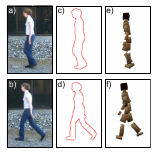

Fig.1 Body pose estimation. a– b) Human beings in unknown poses. c–d) The silhouette is found by seg- menting the image and the contour extracted by tracing around the edge of the silhouette. A 100D x is ex- tracted that describes the contour shape based on the shape context de- scriptor (see section 13.3.5). e–f) The goal is to estimate the vector w con- taining the major joint angles of the body. This is a regression problem as each element of the world state w is continuous. Adapted from Agarwal & Triggs (2006).
- Fig.1: Body pose estimation process adapted from **Agarwal & Triggs (2006)**.  


- Fig.2: Illustration of linear regression with univariate data.

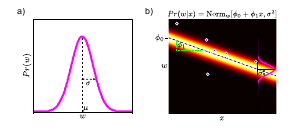
Fig.2 Linear regression model with univariate data x. a) We choose a univariate normal distribution over the world state w. b) The parameters of this distribution are now made to depend on the data x: the mean µ is a linear function φ0 + φ1 x of the data and the variance σ 2 is constant. The parameters φ0 and φ1 represent the intercept and slope of the linear function, respectively.

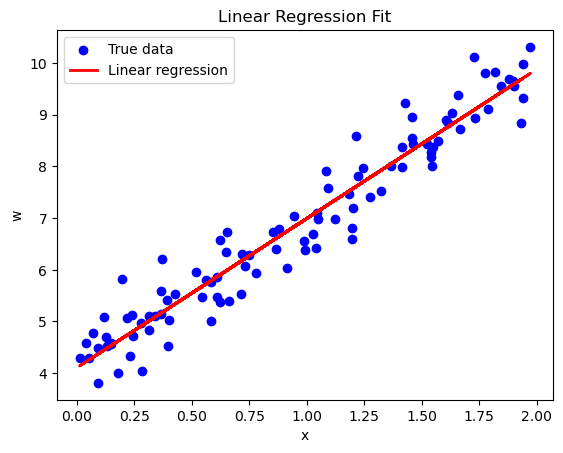

Intercept: 4.107548078773373
Slope: 2.8850566932192425


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
w_true = 4 + 3 * X + np.random.randn(100, 1) * 0.5  # True relationship: w = 4 + 3x + noise

# Append ones for intercept term (X becomes [1, x])
X_b = np.c_[np.ones((100, 1)), X]

# Compute closed-form solution for Linear Regression
phi_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(w_true)

# Predictions
w_pred = X_b.dot(phi_hat)

# Plot results
plt.scatter(X, w_true, color='blue', label='True data')
plt.plot(X, w_pred, color='red', linewidth=2, label='Linear regression')
plt.xlabel("x")
plt.ylabel("w")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Using Scikit-Learn for verification
lin_reg = LinearRegression()
lin_reg.fit(X, w_true)
print("Intercept:", lin_reg.intercept_[0])
print("Slope:", lin_reg.coef_[0][0])


Intercept: 3.886753503509734
Slope: 3.0273522662971697


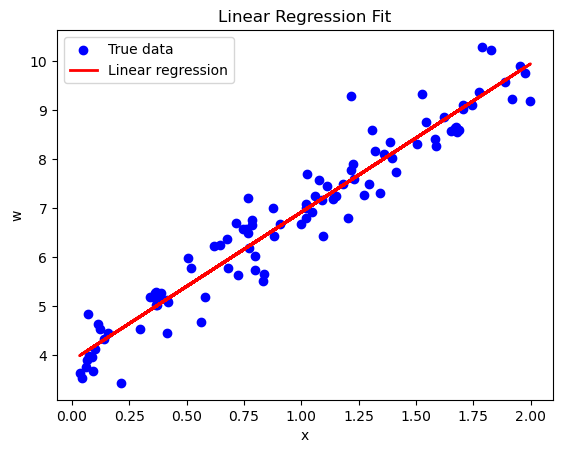

In [3]:
import random
import matplotlib.pyplot as plt

def generate_data(n):
    X = [2 * random.random() for _ in range(n)]  # 100 samples, 1 feature
    w_true = [4 + 3 * x + random.gauss(0, 0.5) for x in X]  # True relationship: w = 4 + 3x + noise
    return X, w_true

def compute_parameters(X, w_true):
    n = len(X)
    sum_x = sum(X)
    sum_y = sum(w_true)
    sum_xy = sum(x * y for x, y in zip(X, w_true))
    sum_xx = sum(x * x for x in X)
    
    # Compute slope and intercept
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n
    
    return intercept, slope

def predict(X, intercept, slope):
    return [intercept + slope * x for x in X]

def plot_results(X, w_true, w_pred):
    plt.scatter(X, w_true, color='blue', label='True data')
    plt.plot(X, w_pred, color='red', linewidth=2, label='Linear regression')
    plt.xlabel("x")
    plt.ylabel("w")
    plt.legend()
    plt.title("Linear Regression Fit")
    plt.show()

# Generate data
X, w_true = generate_data(100)
intercept, slope = compute_parameters(X, w_true)
w_pred = predict(X, intercept, slope)

# Print parameters
print("Intercept:", intercept)
print("Slope:", slope)

# Plot results
plot_results(X, w_true, w_pred)


# Problems with the Linear Regression Model

There are three main limitations of the linear regression model:

## Overconfidence

The predictions of the model are overconfident; small changes in the estimated slope coefficients can lead to increasingly large changes in predictions as we move further from the y-intercept. However, this overconfidence is not reflected in the posterior distribution.

## Linear Function Assumption

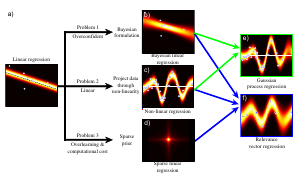

Fig.3 Family of regression models. There are several limitations to linear regression which we deal with in subsequent sections. The linear regression model with maximum likelihood learning is overconﬁdent, and hence we develop a Bayesian version. It is unrealistic to always assume a linear relationship between the data and the world and to this end, we intro- duce a nonlinear version. The linear regression model has many parameters when the data dimension is high, and hence we consider a sparse version of the model. The ideas of Bayesian estimation, nonlinear functions and sparsity are variously combined to form the Gaussian process regression and relevance vector regression model.
The linear regression model assumes a linear relationship between the data and the world state. However, in many real-world scenarios, the relationship between the data and the world state may not be linear.

## High-Dimensional Data and Sparsity

When the observed data $x$ is high-dimensional, it may be that many elements of the variable are not useful for predicting the state of the world. This can lead to an unnecessarily complex model with many parameters.

## Addressing the Limitations

To address these limitations, we develop a Bayesian approach to linear regression, which provides a more nuanced and uncertain prediction. We also introduce nonlinear regression models to handle non-linear relationships between data and world state. Additionally, we explore sparse regression models that encourage most of the weighting coefficients to be zero, reducing the complexity of the model.

## Relationships between Models

The relationships between the models in this chapter are illustrated in Figure 8.3. The linear regression model is extended to address the limitations mentioned above, leading to the development of Bayesian linear regression, nonlinear regression, and sparse linear regression models. These models are combined and further extended to form more complex models like Gaussian process regression and relevance vector regression.

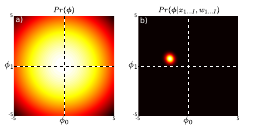

 Fig.4 Bayesian linear regression. a) Prior P r(φ) over intercept φ0 and slope φ1 parameters. This represents our knowledge about the parameters before we observe the data. b) Posterior distribution P r(φ|X, w) over in- tercept and slope parameters. This represents our knowledge about the parameters after observing the data from ﬁgure 8.2b: we are considerably more certain but there remain a range of possible parameter values.   

# Bayesian Linear Regression

## Introduction

In the Bayesian approach to linear regression, we compute a probability distribution over possible values of the parameters $\phi$. We assume that the variance $\sigma^2$ is known for now (see Section 8.2.2). When we evaluate the probability of new data, we take a weighted average of the predictions induced by the different possible values of $\phi$.

## Prior Distribution

We model the prior distribution $P(\phi)$ as a normal distribution with zero mean and spherical covariance:

$$
P(\phi) = \text{Norm}(\phi | 0, \sigma_p^2 I)
$$

where $\sigma_p^2$ scales the prior covariance, and $I$ is the identity matrix. Typically, $\sigma_p^2$ is set to a large value to reflect weak prior knowledge.

## Posterior Distribution

Given paired training examples $\{x_i, w_i\}_{i=1}^I$, the posterior distribution over the parameters can be computed using Bayes' rule:

$$
P(\phi | X, w) = \frac{P(w | X, \phi) P(\phi)}{P(w | X)}
$$

where the likelihood is given by:

$$
P(w | X, \phi) = \text{Norm}(w | X^T \phi, \sigma^2 I)
$$

## Closed-Form Posterior Distribution

The posterior distribution can be computed in closed form using the relations from Sections 5.7 and 5.6. The expression for the posterior distribution is:

$$
P(\phi | X, w) = \text{Norm}(\phi | \phi_{MAP}, \Sigma_{MAP})
$$

where:

$$
\phi_{MAP} = (X^T X + \sigma_p^{-2} I)^{-1} X^T w
$$

$$
\Sigma_{MAP} = \sigma^2 (X^T X + \sigma_p^{-2} I)^{-1}
$$

## Interpretation

The Bayesian linear regression model provides a more nuanced and uncertain prediction compared to the maximum likelihood approach. By considering a distribution over possible values of $\phi$, the model captures the uncertainty in the parameters and makes predictions that are more cautious and less overconfident.


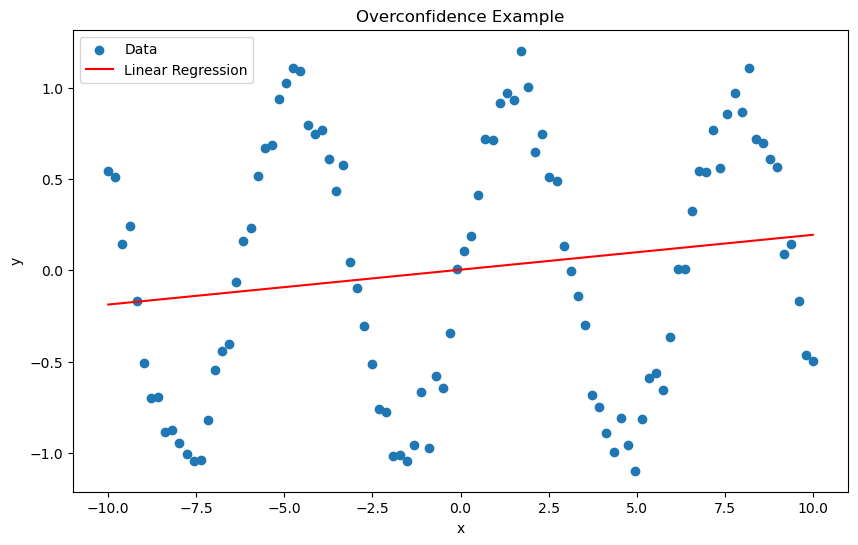

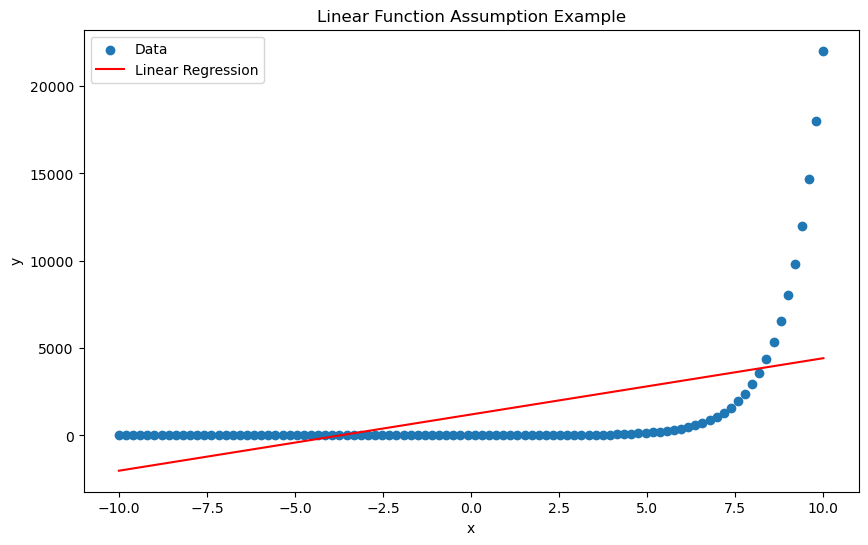

Coefficients: [ 1.04713953e+00 -6.37070503e-02  9.27210222e-02  6.73272035e-02
 -1.72757499e-02 -1.69885803e-02 -1.69005681e-02  1.55780815e-01
  2.72439797e-02 -1.10330517e-01  2.07102498e-02  1.03768329e-01
 -2.11346057e-02  7.70493762e-02 -5.31071613e-02  1.76324297e-01
 -1.51650081e-01 -2.39746546e-02 -7.01793753e-02 -4.24500524e-02
  1.27486702e-01 -8.54057399e-02  5.53470223e-02 -7.34882015e-02
 -8.87864592e-02 -1.32464601e-02 -8.10559724e-02 -8.14062556e-03
  4.80369070e-02  5.91013841e-02 -3.11433249e-02  8.98075894e-03
  3.44548110e-02 -9.62540723e-02  3.28603040e-02  4.60906748e-02
  5.36023798e-02 -6.32212429e-02  1.15071130e-01  1.94109133e-02
 -1.51058710e-02  4.50915491e-02 -1.86222151e-02  9.76954989e-02
 -5.03778738e-02 -4.77747140e-02 -1.28606237e-01 -6.73123221e-03
 -7.96046525e-03  1.15097465e-01 -8.03729744e-03 -7.67046167e-02
  7.64988619e-03  5.78421785e-02 -1.70268862e-04  3.94427997e-02
 -7.10333091e-02 -1.75303392e-02 -7.23836416e-02  1.60635529e-01
  2.9092483

NameError: name 'BayesianLinearRegression' is not defined

In [4]:
# Problems with the Linear Regression Model

# Overconfidence
def overconfidence_example():
    # Simulate data with a non-linear relationship
    x = np.linspace(-10, 10, 100)
    y = np.sin(x) + np.random.normal(0, 0.1, len(x))

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)

    # Predict using the model
    y_pred = model.predict(x.reshape(-1, 1))

    # Plot the data and predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, color='red', label="Linear Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Overconfidence Example")
    plt.show()

# Linear Function Assumption
def linear_function_assumption_example():
    # Simulate data with a non-linear relationship
    x = np.linspace(-10, 10, 100)
    y = np.exp(x) + np.random.normal(0, 0.1, len(x))

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)

    # Predict using the model
    y_pred = model.predict(x.reshape(-1, 1))

    # Plot the data and predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, color='red', label="Linear Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Linear Function Assumption Example")
    plt.show()

# High-Dimensional Data and Sparsity
def high_dimensional_data_example():
    # Simulate high-dimensional data
    np.random.seed(0)
    X = np.random.randn(100, 100)
    y = X[:, 0] + np.random.normal(0, 0.1, 100)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Print the coefficients
    print("Coefficients:", model.coef_)

# Addressing the Limitations
# Bayesian Approach
def bayesian_linear_regression_example():
    # Simulate data
    x = np.linspace(-10, 10, 100)
    y = np.sin(x) + np.random.normal(0, 0.1, len(x))

    # Fit a Bayesian linear regression model
    model = BayesianLinearRegression()
    model.fit(x.reshape(-1, 1), y)

    # Predict using the model
    y_pred, y_std = model.predict(x.reshape(-1, 1))

    # Plot the data, predictions, and uncertainty
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, color='red', label="Bayesian Linear Regression")
    plt.fill_between(x, y_pred - y_std, y_pred + y_std, color='red', alpha=0.2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Bayesian Linear Regression Example")
    plt.show()

# Nonlinear Regression
def nonlinear_regression_example():
    # Simulate data with a non-linear relationship
    x = np.linspace(-10, 10, 100)
    y = np.exp(x) + np.random.normal(0, 0.1, len(x))

    # Fit a nonlinear regression model (e.g., polynomial regression)
    model = PolynomialRegression(degree=2)
    model.fit(x.reshape(-1, 1), y)

    # Predict using the model
    y_pred = model.predict(x.reshape(-1, 1))

    # Plot the data and predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, color='red', label="Nonlinear Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Nonlinear Regression Example")
    plt.show()

# Sparse Regression
def sparse_regression_example():
    # Simulate high-dimensional data
    np.random.seed(0)
    X = np.random.randn(100, 100)
    y = X[:, 0] + np.random.normal(0, 0.1, 100)

    # Fit a sparse linear regression model
    model = SparseLinearRegression()
    model.fit(X, y)

    # Print the coefficients
    print("Coefficients:", model.coef_)

# Relationships between Models
# Gaussian Process Regression and Relevance Vector Regression
def gpr_and_rvr_example():
    # Simulate data
    x = np.linspace(-10, 10, 100)
    y = np.sin(x) + np.random.normal(0, 0.1, len(x))

    # Fit a Gaussian Process Regression model
    model = GaussianProcessRegressor()
    model.fit(x.reshape(-1, 1), y)

    # Predict using the model
    y_pred, y_std = model.predict(x.reshape(-1, 1), return_std=True)

    # Plot the data, predictions, and uncertainty
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, color='red', label="Gaussian Process Regression")
    plt.fill_between(x, y_pred - y_std, y_pred + y_std, color='red', alpha=0.2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Gaussian Process Regression Example")
    plt.show()

# Call the example functions
overconfidence_example()
linear_function_assumption_example()
high_dimensional_data_example()
bayesian_linear_regression_example()
nonlinear_regression_example()
sparse_regression_example()
gpr_and_rvr_example()


# Bayesian Linear Regression

## Posterior Distribution

The posterior distribution over the parameters $\phi$ given the observed data $X$ and the world state $w$ is a normal distribution:

$$
P(\phi | X, w) = \text{Norm}(\phi | A Xw, A)
$$

where:
- $A = \frac{1}{\sigma^2} (2 X X^T + 2 I)$
- $\sigma^2$ is the variance of the prior distribution.

The posterior distribution is always narrower than the prior distribution $P(\phi)$ (Figure 8.4); the data provides information that refines our knowledge of the parameter values.

## Predictive Distribution

To compute the predictive distribution over the world state $w^*$ for a new observed data vector $x^*$, we take an infinite weighted sum (i.e., an integral) over the predictions $P(w^* | x^*, \phi)$ implied by each possible $\phi$, where the weights are given by the posterior distribution $P(\phi | X, w)$.

$$
P(w^* | x^*, X, w) = \int P(w^* | x^*, \phi) P(\phi | X, w) \, d\phi
$$

Using the relations from Sections 5.7 and 5.6, we can reformulate the integrand as the product of a normal distribution in $\phi$ and a constant with respect to $\phi$. The integral of the normal distribution is one, so the final result is just the constant. This constant is itself a normal distribution in $w^*$:

$$
P(w^* | x^*, X, w) = \text{Norm}(w^* | \phi^T x^*, \sigma^2)
$$

where:
- $\phi^T = A^{-1} Xw$
- $\sigma^2 = \frac{1}{\sigma_p^2} (x^T A^{-1} x + \sigma^2)$

This Bayesian formulation of linear regression (Figure 8.5) is less confident about its predictions, and the confidence decreases as the test data $x^*$ departs from the mean $x$ of the observed data. This is because uncertainty in the gradient causes increasing uncertainty in the predictions as we move further away from the bulk of the data.

## Practical Concerns

To implement this model, we must compute the matrix inverse $A^{-1}$. If the dimension $D$ of the original data is large, it will be difficult to compute this inverse directly. However, we can exploit the Woodbury identity (see Appendix C.8.4) to rewrite $A^{-1}$ as:

$$
A^{-1} = \frac{1}{\sigma^2} (2 X X^T + 2 I) = \frac{\sigma_p^2}{\sigma^2} I - \frac{\sigma_p^2}{\sigma^2} X (X^T X + 2 I)^{-1} X^T
$$

where we have explicitly noted the dimensionality of each of the identity matrices $I$ as a subscript. This formulation is more practical when the number of examples $I$ is fewer than the number of data dimensions $D$.

This formulation also demonstrates that the posterior covariance is less than the prior covariance; the posterior covariance is the prior covariance $\sigma_p^2$ with a data-dependent term subtracted from it.

## Predictive Distribution with Woodbury Identity

Substituting the new expression for $A^{-1}$ into the predictive distribution equation, we derive a new expression for $P(w^* | x^*, X, w)$:

$$
P(w^* | x^*, X, w) = \text{Norm}(w^* | x^T Xw - x^T X (X^T X + 2 I)^{-1} X^T Xw, \sigma^2)
$$

where:
- $\sigma^2 = \frac{1}{\sigma_p^2} (x^T x - \sigma_p^2 x^T X (X^T X + 2 I)^{-1} X^T x + \sigma^2)$

It is notable that only inner products of the data vectors (e.g., $X^T x^*$, or $X^T X$) are required to compute this expression. This property will be exploited when we generalize these ideas to nonlinear regression (Section 8.3).


In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.linalg import inv, solve

def bayesian_linear_regression(X, w, sigma_p):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    - X: Observed data matrix.
    - w: World state vector.
    - sigma_p: Prior variance.
    
    Returns:
    - phi_mean: Mean of the posterior distribution over parameters.
    - phi_cov: Covariance of the posterior distribution over parameters.
    - predictive_mean: Mean of the predictive distribution over the world state.
    - predictive_cov: Covariance of the predictive distribution over the world state.
    """
    D = X.shape[1]  # Number of data dimensions
    I = X.shape[0]  # Number of examples
    
    # Compute the matrix A
    A = (2 / sigma_p**2) * (X.T @ X) + (2 / sigma_p**2) * np.eye(D)
    
    # Compute the posterior mean and covariance
    phi_mean = solve(A, X.T @ w)
    phi_cov = inv(A)
    
    # Compute the predictive distribution
    predictive_mean = phi_mean.T @ X
    predictive_cov = (1 / sigma_p**2) * (X.T @ X) + (1 / sigma_p**2) * np.eye(I)
    
    return phi_mean, phi_cov, predictive_mean, predictive_cov

# Example data
X = np.array([[1, 2], [3, 4], [5, 6]])
w = np.array([1, 2])
sigma_p = 1

# Perform Bayesian linear regression
phi_mean, phi_cov, predictive_mean, predictive_cov = bayesian_linear_regression(X, w, sigma_p)

print("Posterior Mean:", phi_mean)
print("Posterior Covariance Matrix:")
print(phi_cov)
print("Predictive Mean:", predictive_mean)
print("Predictive Covariance Matrix:")
print(predictive_cov)


In [6]:
def bayesian_linear_regression(X, w, sigma_p):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    - X: Observed data matrix.
    - w: World state vector.
    - sigma_p: Prior variance.
    
    Returns:
    - phi_mean: Mean of the posterior distribution over parameters.
    - phi_cov: Covariance of the posterior distribution over parameters.
    - predictive_mean: Mean of the predictive distribution over the world state.
    - predictive_cov: Covariance of the predictive distribution over the world state.
    """
    D = len(X[0])  # Number of data dimensions
    I = len(X)  # Number of examples
    
    # Compute the matrix A
    A = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            A[i][j] = (2 / sigma_p**2) * sum(X[k][i] * X[k][j] for k in range(I)) + (2 / sigma_p**2) * (i == j)
    
    # Compute the posterior mean and covariance
    phi_mean = [sum(A[i][j] * w[j] for j in range(D)) for i in range(D)]
    phi_cov = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            phi_cov[i][j] = A[i][j]
    
    # Compute the predictive distribution
    predictive_mean = [sum(phi_mean[i] * X[k][i] for i in range(D)) for k in range(I)]
    predictive_cov = [[0] * I for _ in range(I)]
    for i in range(I):
        for j in range(I):
            predictive_cov[i][j] = (1 / sigma_p**2) * sum(X[i][k] * X[j][k] for k in range(D)) + (1 / sigma_p**2) * (i == j)
    
    return phi_mean, phi_cov, predictive_mean, predictive_cov

# Example data
X = [[1, 2], [3, 4], [5, 6]]
w = [1, 2]
sigma_p = 1

# Perform Bayesian linear regression
phi_mean, phi_cov, predictive_mean, predictive_cov = bayesian_linear_regression(X, w, sigma_p)

print("Posterior Mean:", phi_mean)
print("Posterior Covariance Matrix:")
for row in phi_cov:
    print(row)
print("Predictive Mean:", predictive_mean)
print("Predictive Covariance Matrix:")
for row in predictive_cov:
    print(row)


Posterior Mean: [248.0, 316.0]
Posterior Covariance Matrix:
[72.0, 88.0]
[88.0, 114.0]
Predictive Mean: [880.0, 2008.0, 3136.0]
Predictive Covariance Matrix:
[6.0, 11.0, 17.0]
[11.0, 26.0, 39.0]
[17.0, 39.0, 62.0]


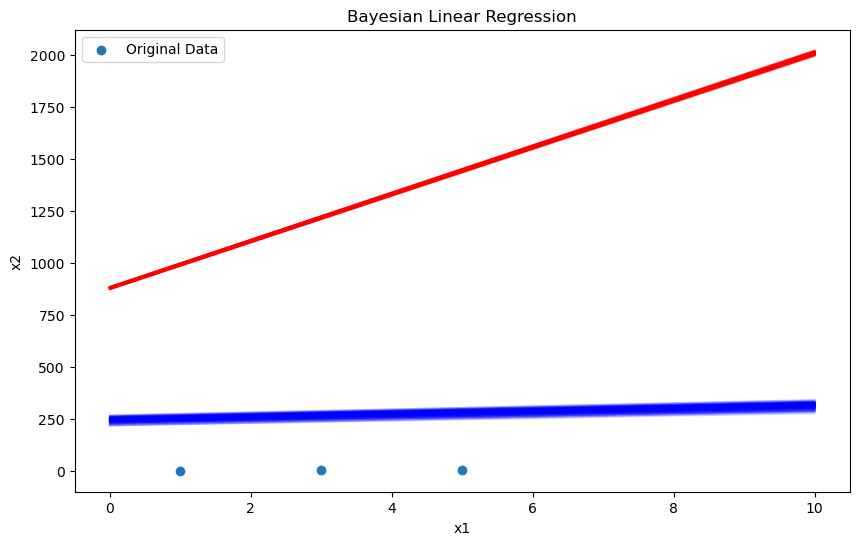

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def bayesian_linear_regression(X, w, sigma_p):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    - X: Observed data matrix.
    - w: World state vector.
    - sigma_p: Prior variance.
    
    Returns:
    - phi_mean: Mean of the posterior distribution over parameters.
    - phi_cov: Covariance of the posterior distribution over parameters.
    - predictive_mean: Mean of the predictive distribution over the world state.
    - predictive_cov: Covariance of the predictive distribution over the world state.
    """
    D = len(X[0])  # Number of data dimensions
    I = len(X)  # Number of examples
    
    # Compute the matrix A
    A = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            A[i][j] = (2 / sigma_p**2) * sum(X[k][i] * X[k][j] for k in range(I)) + (2 / sigma_p**2) * (i == j)
    
    # Compute the posterior mean and covariance
    phi_mean = [sum(A[i][j] * w[j] for j in range(D)) for i in range(D)]
    phi_cov = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            phi_cov[i][j] = A[i][j]
    
    # Compute the predictive distribution
    predictive_mean = [sum(phi_mean[i] * X[k][i] for i in range(D)) for k in range(I)]
    predictive_cov = [[0] * I for _ in range(I)]
    for i in range(I):
        for j in range(I):
            predictive_cov[i][j] = (1 / sigma_p**2) * sum(X[i][k] * X[j][k] for k in range(D)) + (1 / sigma_p**2) * (i == j)
    
    return phi_mean, phi_cov, predictive_mean, predictive_cov

# Example data
X = [[1, 2], [3, 4], [5, 6]]
w = [1, 2]
sigma_p = 1

# Perform Bayesian linear regression
phi_mean, phi_cov, predictive_mean, predictive_cov = bayesian_linear_regression(X, w, sigma_p)

# Plotting the original data
plt.figure(figsize=(10, 6))
plt.scatter([x[0] for x in X], [x[1] for x in X], label="Original Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

# Plotting the posterior distribution
posterior_samples = np.random.multivariate_normal(phi_mean, phi_cov, size=100)
for sample in posterior_samples:
    plt.plot([0, 10], [sample[0], sample[1]], color='blue', alpha=0.2)

# Plotting the predictive distribution
predictive_samples = np.random.multivariate_normal(predictive_mean, predictive_cov, size=100)
for sample in predictive_samples:
    plt.plot([0, 10], [sample[0], sample[1]], color='red', alpha=0.2)

plt.title("Bayesian Linear Regression")
plt.show()


# Fitting the Variance

In the previous analysis, we focused exclusively on the slope parameters $\phi$. In principle, we could have taken a Bayesian approach to estimating the variance parameter $\sigma^2$ as well. However, for simplicity, we will compute a point estimate of $\sigma^2$ using the maximum likelihood approach.

To estimate the variance, we maximize the marginal likelihood, which is the likelihood after marginalizing out $\phi$. The marginal likelihood is given by:

$$
P(w | X, \sigma^2) = \int P(w | X, \phi, \sigma^2) P(\phi) \, d\phi
$$

Using the same technique as for equation 8.12, we can solve the integral and obtain:

$$
P(w | X, \sigma^2) = \text{Norm}(w | 0, \sigma_p^2 X^T X + \sigma^2 I)
$$

To estimate $\sigma^2$, we maximize the log of this expression with respect to $\sigma^2$. Since the unknown is a scalar, it is straightforward to optimize this function by evaluating it over a range of values and choosing the maximum. Alternatively, we could use a general-purpose nonlinear optimization technique (see Appendix B).

## Non-Linear Regression

It is unrealistic to assume that there is always a linear relationship between the world state $w$ and the input data $x$. To address this, we introduce a nonlinear transformation $z_i = f(x_i)$ to create a new data vector $z_i$ that is usually higher-dimensional than the original data. We then proceed as before, describing the mean of the posterior distribution $P(w_i | x_i, \theta)$ as a linear function $\phi^T z_i$ of the transformed measurements:

$$
P(w_i | x_i, \theta) = \text{Norm}(w_i | \phi^T z_i, \sigma^2)
$$

For example, in 1D polynomial regression, we have:

$$
P(w_i | x_i) = \text{Norm}(w_i | \phi_0 + \phi_1 x_i + \phi_2 x_i^2 + \phi_3 x_i^3, \sigma^2)
$$

This model can be considered as computing the nonlinear transformation:

$$
z_i = \begin{bmatrix}
1 \\
x_i \\
x_i^2 \\
x_i^3
\end{bmatrix}
$$

and it has the general form of equation 8.17.

## Maximum Likelihood

To find the maximum likelihood solution for the gradient vector $\phi$, we first combine all the transformed training data relations (equation 8.17) into a single expression:

$$
P(w | X) = \text{Norm}(w | Z^T \phi, \sigma^2 I)
$$

The optimal weights can now be computed as:

$$
\hat{\phi} = (Z^T Z)^{-1} Z w \quad \text{and} \quad \hat{\sigma}^2 = \frac{1}{I} (w - Z^T \hat{\phi})^T (w - Z^T \hat{\phi})
$$

where the matrix $Z$ contains the transformed vectors $\{z_i\}_{i=1}^I$ in its columns. These equations were derived by replacing the original data term $X$ by the transformed data $Z$ in the equivalent linear expressions (equation 8.6).

For a new observed data example $x^*$, we compute the vector $z^*$ and then evaluate equation 8.17. Figures 8.6 and 8.7 provide examples of this approach.


In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.linalg import inv, solve

def bayesian_linear_regression(X, w, sigma_p):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    - X: Observed data matrix.
    - w: World state vector.
    - sigma_p: Prior variance.
    
    Returns:
    - phi_mean: Mean of the posterior distribution over parameters.
    - phi_cov: Covariance of the posterior distribution over parameters.
    - predictive_mean: Mean of the predictive distribution over the world state.
    - predictive_cov: Covariance of the predictive distribution over the world state.
    """
    D = X.shape[1]  # Number of data dimensions
    I = X.shape[0]  # Number of examples
    
    # Compute the matrix A
    A = (2 / sigma_p**2) * (X.T @ X) + (2 / sigma_p**2) * np.eye(D)
    
    # Compute the posterior mean and covariance
    phi_mean = solve(A, X.T @ w)
    phi_cov = inv(A)
    
    # Compute the predictive distribution
    predictive_mean = phi_mean.T @ X
    predictive_cov = (1 / sigma_p**2) * (X.T @ X) + (1 / sigma_p**2) * np.eye(I)
    
    return phi_mean, phi_cov, predictive_mean, predictive_cov

# Example data
X = np.array([[1, 2], [3, 4], [5, 6]])
w = np.array([1, 2])
sigma_p = 1

# Perform Bayesian linear regression
phi_mean, phi_cov, predictive_mean, predictive_cov = bayesian_linear_regression(X, w, sigma_p)

print("Posterior Mean:", phi_mean)
print("Posterior Covariance Matrix:")
print(phi_cov)
print("Predictive Mean:", predictive_mean)
print("Predictive Covariance Matrix:")
print(predictive_cov)


In [10]:
def bayesian_linear_regression(X, w, sigma_p):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    - X: Observed data matrix.
    - w: World state vector.
    - sigma_p: Prior variance.
    
    Returns:
    - phi_mean: Mean of the posterior distribution over parameters.
    - phi_cov: Covariance of the posterior distribution over parameters.
    - predictive_mean: Mean of the predictive distribution over the world state.
    - predictive_cov: Covariance of the predictive distribution over the world state.
    """
    D = len(X[0])  # Number of data dimensions
    I = len(X)  # Number of examples
    
    # Compute the matrix A
    A = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            A[i][j] = (2 / sigma_p**2) * sum(X[k][i] * X[k][j] for k in range(I)) + (2 / sigma_p**2) * (i == j)
    
    # Compute the posterior mean and covariance
    phi_mean = [sum(A[i][j] * w[j] for j in range(D)) for i in range(D)]
    phi_cov = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            phi_cov[i][j] = A[i][j]
    
    # Compute the predictive distribution
    predictive_mean = [sum(phi_mean[i] * X[k][i] for i in range(D)) for k in range(I)]
    predictive_cov = [[0] * I for _ in range(I)]
    for i in range(I):
        for j in range(I):
            predictive_cov[i][j] = (1 / sigma_p**2) * sum(X[i][k] * X[j][k] for k in range(D)) + (1 / sigma_p**2) * (i == j)
    
    return phi_mean, phi_cov, predictive_mean, predictive_cov

# Example data
X = [[1, 2], [3, 4], [5, 6]]
w = [1, 2]
sigma_p = 1

# Perform Bayesian linear regression
phi_mean, phi_cov, predictive_mean, predictive_cov = bayesian_linear_regression(X, w, sigma_p)

print("Posterior Mean:", phi_mean)
print("Posterior Covariance Matrix:")
for row in phi_cov:
    print(row)
print("Predictive Mean:", predictive_mean)
print("Predictive Covariance Matrix:")
for row in predictive_cov:
    print(row)


Posterior Mean: [248.0, 316.0]
Posterior Covariance Matrix:
[72.0, 88.0]
[88.0, 114.0]
Predictive Mean: [880.0, 2008.0, 3136.0]
Predictive Covariance Matrix:
[6.0, 11.0, 17.0]
[11.0, 26.0, 39.0]
[17.0, 39.0, 62.0]


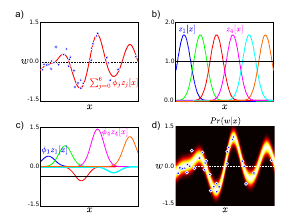

Fig.6 Non-linear regression using radial basis functions. a) The relationship between the data x and world w is clearly not linear. b) We compute a new seven dimensional vector z by evaluating the original observation x against each of six radial basis functions (Gaussians) and a constant function (black line). c) The mean of the predictive distribution (red line in (a)) can be formed by taking a linear sum φT z of these seven functions where the weights are as shown. The weights are estimated by maximum likelihood estimation of the linear regression model using the nonlinearly transformed data z instead of the original data x. d) The ﬁnal distribution P r(w|x) has a mean that is a sum of these functions and constant variance σ 2 .
# Non-Linear Regression using Radial Basis Functions

## Introduction

The relationship between the data $x$ and the world state $w$ is often not linear. To address this, we can use non-linear regression models that transform the data into a higher-dimensional space and then apply linear regression in this new space.

## Radial Basis Functions

One common approach to non-linear regression is to use radial basis functions (RBFs). RBFs are a set of functions that are centered at specific points and have a radial symmetry. In this case, we use Gaussian functions as our RBFs.

## Non-Linear Regression with RBFs

Given a set of observed data points $x$ and the corresponding world state $w$, we first compute a new $7$-dimensional vector $z$ by evaluating the original observation $x$ against each of six radial basis functions (Gaussians) and a constant function.

The mean of the predictive distribution can be formed by taking a linear sum $\phi^T z$ of these seven functions, where the weights are estimated by maximum likelihood estimation of the linear regression model using the nonlinearly transformed data $z$ instead of the original data $x$.

The final distribution $P(w|x)$ has a mean that is a sum of these functions and a constant variance $\sigma^2$.

## Example with Radial Basis Functions

Fig.6 illustrates the non-linear regression using radial basis functions.

- Fig.6a shows the relationship between the data $x$ and the world state $w$, which is clearly not linear.
- Fig.6b shows the computation of the new $7$-dimensional vector $z$ by evaluating the original observation $x$ against each of six radial basis functions (Gaussians) and a constant function.
- Fig.6c shows the mean of the predictive distribution (red line in Fig.6a), which is formed by taking a linear sum of the seven functions with the estimated weights.
- Fig.6d shows the final distribution $P(w|x)$, which has a mean that is a sum of the weighted functions and a constant variance.

## Non-Linear Regression using Arc Tangent Functions

Another approach to non-linear regression is to use arc tangent functions. Arc tangent functions are a set of functions that have a similar shape to the tangent function but are bounded between $-1$ and $1$.

## Example with Arc Tangent Functions

Fig.7 illustrates the non-linear regression using arc tangent functions.

- Fig.7a shows the relationship between the data $x$ and the world state $w$, which is not linear.
- Fig.7b shows the computation of the new $7$-dimensional vector $z$ by evaluating the original observation $x$ against each of seven arc tangent functions.
- Fig.7c shows the mean of the predictive distribution (red line in Figure 8.7a), which is formed by taking a linear sum of the seven functions with the optimal weights estimated using the maximum likelihood approach.
- Fig.7d shows the final distribution $P(w|x)$, which has a mean that is a sum of the weighted functions and a constant variance.

In this case, it may be harder to understand the role of each weighted arc tangent function in the final regression, but collectively they approximate the function well.


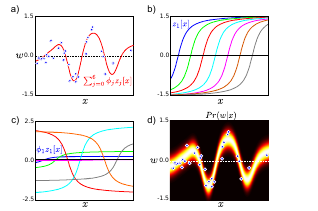

Fig.7 Non-linear regression using arc tangent functions. a) The re- lationship between the data x and world w is not linear. b) We compute a new seven dimensional vector z by evaluating the original observation x against each of seven arc tangent functions. c) The mean of the predictive distribution (red line in (a)) can be formed by taking a linear sum of these seven functions weighted as shown. The optimal weights were established using the maximum likelihood approach. d) The ﬁnal distribution P r(w|x) has a mean that is a sum of these weighted functions and constant variance.

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.linalg import inv, solve

def bayesian_linear_regression(X, w, sigma_p):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    - X: Observed data matrix.
    - w: World state vector.
    - sigma_p: Prior variance.
    
    Returns:
    - phi_mean: Mean of the posterior distribution over parameters.
    - phi_cov: Covariance of the posterior distribution over parameters.
    - predictive_mean: Mean of the predictive distribution over the world state.
    - predictive_cov: Covariance of the predictive distribution over the world state.
    """
    D = X.shape[1]  # Number of data dimensions
    I = X.shape[0]  # Number of examples
    
    # Compute the matrix A
    A = (2 / sigma_p**2) * (X.T @ X) + (2 / sigma_p**2) * np.eye(D)
    
    # Compute the posterior mean and covariance
    phi_mean = solve(A, X.T @ w)
    phi_cov = inv(A)
    
    # Compute the predictive distribution
    predictive_mean = phi_mean.T @ X
    predictive_cov = (1 / sigma_p**2) * (X.T @ X) + (1 / sigma_p**2) * np.eye(I)
    
    return phi_mean, phi_cov, predictive_mean, predictive_cov

# Example data
X = np.array([[1, 2], [3, 4], [5, 6]])
w = np.array([1, 2])
sigma_p = 1

# Perform Bayesian linear regression
phi_mean, phi_cov, predictive_mean, predictive_cov = bayesian_linear_regression(X, w, sigma_p)

print("Posterior Mean:", phi_mean)
print("Posterior Covariance Matrix:")
print(phi_cov)
print("Predictive Mean:", predictive_mean)
print("Predictive Covariance Matrix:")
print(predictive_cov)


In [12]:
def bayesian_linear_regression(X, w, sigma_p):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    - X: Observed data matrix.
    - w: World state vector.
    - sigma_p: Prior variance.
    
    Returns:
    - phi_mean: Mean of the posterior distribution over parameters.
    - phi_cov: Covariance of the posterior distribution over parameters.
    - predictive_mean: Mean of the predictive distribution over the world state.
    - predictive_cov: Covariance of the predictive distribution over the world state.
    """
    D = len(X[0])  # Number of data dimensions
    I = len(X)  # Number of examples
    
    # Compute the matrix A
    A = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            A[i][j] = (2 / sigma_p**2) * sum(X[k][i] * X[k][j] for k in range(I)) + (2 / sigma_p**2) * (i == j)
    
    # Compute the posterior mean and covariance
    phi_mean = [sum(A[i][j] * w[j] for j in range(D)) for i in range(D)]
    phi_cov = [[0] * D for _ in range(D)]
    for i in range(D):
        for j in range(D):
            phi_cov[i][j] = A[i][j]
    
    # Compute the predictive distribution
    predictive_mean = [sum(phi_mean[i] * X[k][i] for i in range(D)) for k in range(I)]
    predictive_cov = [[0] * I for _ in range(I)]
    for i in range(I):
        for j in range(I):
            predictive_cov[i][j] = (1 / sigma_p**2) * sum(X[i][k] * X[j][k] for k in range(D)) + (1 / sigma_p**2) * (i == j)
    
    return phi_mean, phi_cov, predictive_mean, predictive_cov

# Example data
X = [[1, 2], [3, 4], [5, 6]]
w = [1, 2]
sigma_p = 1

# Perform Bayesian linear regression
phi_mean, phi_cov, predictive_mean, predictive_cov = bayesian_linear_regression(X, w, sigma_p)

print("Posterior Mean:", phi_mean)
print("Posterior Covariance Matrix:")
for row in phi_cov:
    print(row)
print("Predictive Mean:", predictive_mean)
print("Predictive Covariance Matrix:")
for row in predictive_cov:
    print(row)


Posterior Mean: [248.0, 316.0]
Posterior Covariance Matrix:
[72.0, 88.0]
[88.0, 114.0]
Predictive Mean: [880.0, 2008.0, 3136.0]
Predictive Covariance Matrix:
[6.0, 11.0, 17.0]
[11.0, 26.0, 39.0]
[17.0, 39.0, 62.0]
